# Data Analytics I

## Visualization of Basic Asymptotic Results

The two main basic asymptotic results introduced in the lecture are visualized below: 
- Law of Large Numbers (LLN) for the sample mean and 
- Central Limit Theorem (CLT) for the standardized sample mean.

Briefly, both LLN and CLT are describing large sample behaviour of a sample mean based on many independent samples from the same distribution.

To visualize the two statements for the (standardized) sample mean in a Monte Carlo simulation, a sample of $N$ iid Bernoulli variables $X$ (taking one of the two values $x = \{0,1\}$) with mean $E[X] = Pr(X = 1) = \mu$ is drawn and averaged 2000 times for each $N \in \{10, 40, 160, 640, 2560, 10240 \}$:
$$ \bar X_N = \frac{\sum_{i=1}^N X_i}{N}.$$

The specific steps to visualize the results for an increasing sequence of $N$ are:
1. Repeat 2000 times:
    - draw $N$ iid variables $X$ from a Bernoulli distribution with $E[X] = Pr(X = 1) = \mu$,
    - calculate the sample mean $\bar X_N$ or standardized sample mean $\sqrt{N} \frac{\bar X_N - E[X]}{\sqrt{var(X)}}$.
2. Plot the histogram of the 2000 (standardized) sample means for each $N$.

### Prepare the Simulation

First, the parameters of the simulation have to be initialized.

In [13]:
### Define Simulation Parameters ###

rep <- 2000 # Number of replications
sample_sizes <- c(10, 40, 160, 640, 2560, 10240) # Sample sizes used in the simulation
mu <- 0.5 # Mean of the Bernoulli distribution

print('Simulation parameters are defined.')

[1] "Simulation parameters are defined."


### Monte Carlo Simulation

Now, we can draw 2000 different samples for each $N$ and save the sample means (needed for both LLN and CLT visualization):

In [14]:
### Drawing random samples and calculating the sample average ### 

# Set starting value (seed) for random number generators, such that results can be replicated
set.seed(11112020)

# Generate matrix to store the sample means for each replication for each sample size N
# Rows correspond to different replications
# Columns correspond to different sample sizes
average <- matrix(NA, nrow = rep, ncol = length(sample_sizes))

# For loop over the replications
for (i in c(1:rep)) {
    # For loop over the sample sizes
    for (n in c(1:length(sample_sizes))) {
        
        # Draw N Bernoulli random variables X with Pr(X = 1) = mu
        x <- rbinom(sample_sizes[n], 1, mu) # Bernoulli RV is a Binomial RV with one attempt and success probability mu
                
        # Calculate sample mean
        average[i,n] <- mean(x) # calculate sample mean for each replication
    }
}

print('Sample means are estimated.')

[1] "Sample means are estimated."



### Law of Large Numbers

The LLN says us that the sample mean of many independent samples is (with high probability) close to the mean of the underlying distribution as $N$ grows, i.e.
$$ \bar X_N \overset{p}{\rightarrow} \mu. $$
The following code illustrates this result.

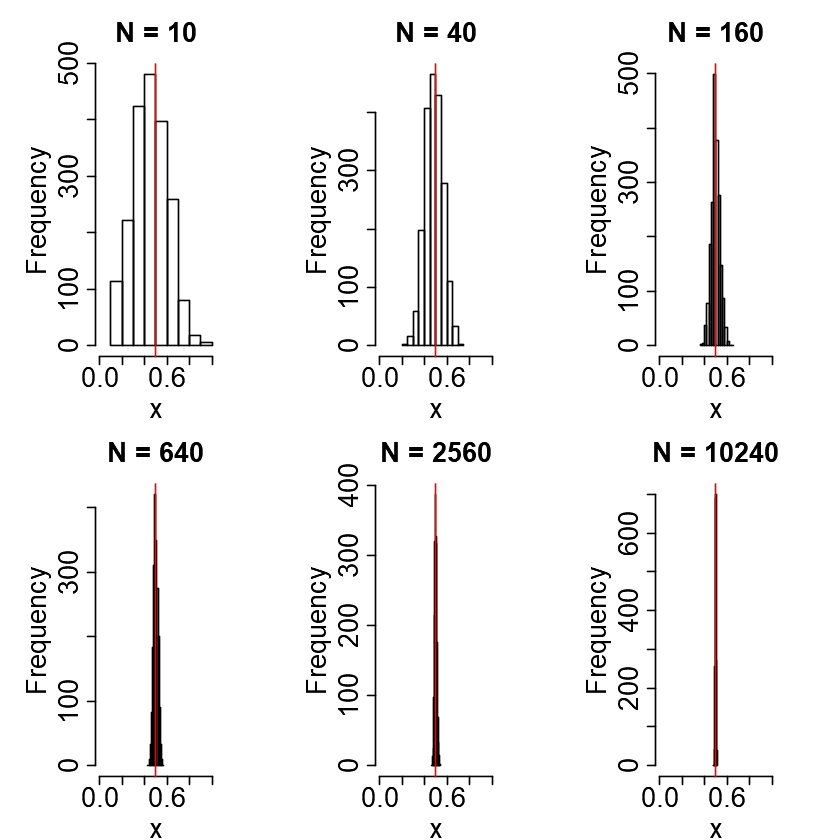

In [15]:
### Law of Large Numbers ###

# Plot results for 6 different sample sizes separately in 2 rows and 3 columns 
# and change left margins of the plots from 4 (default) to 6 (otherwise the y-axis label is cut off)
par(mfrow = c(2, 3), mar = c(4,6,4,4))

# Histograms of the 2000 sample means for each N
for (n in c(1:length(sample_sizes))) {
    hist(average[,n], xlim = c(0,1), main = paste("N =", sample_sizes[n]), xlab = "x",       
         cex.main = 2, cex.lab = 2, cex.axis = 2) # Increase font size of the titles, labels and ticks
    abline(v=mu, col="red") # Red vertical line representing the true mu
}

Here, you can graphically see that $\bar X_N$ is a consistent estimator of $\mu$ as the LLN shows.

### Central Limit Theorem

The distribution of a standardized mean
$$\sqrt{N} \frac{\bar X_N - \mu}{\sqrt{var(X)}}$$
is converging to standard normal distribution when the sample size $N$ grows, i.e.
$$\sqrt{N} \frac{\bar X_N - \mu}{\sqrt{var(X)}} \overset{d}{\rightarrow} N(0,1).$$

That also implies that $\bar X_N \sim N(\mu, var(X)/N)$.

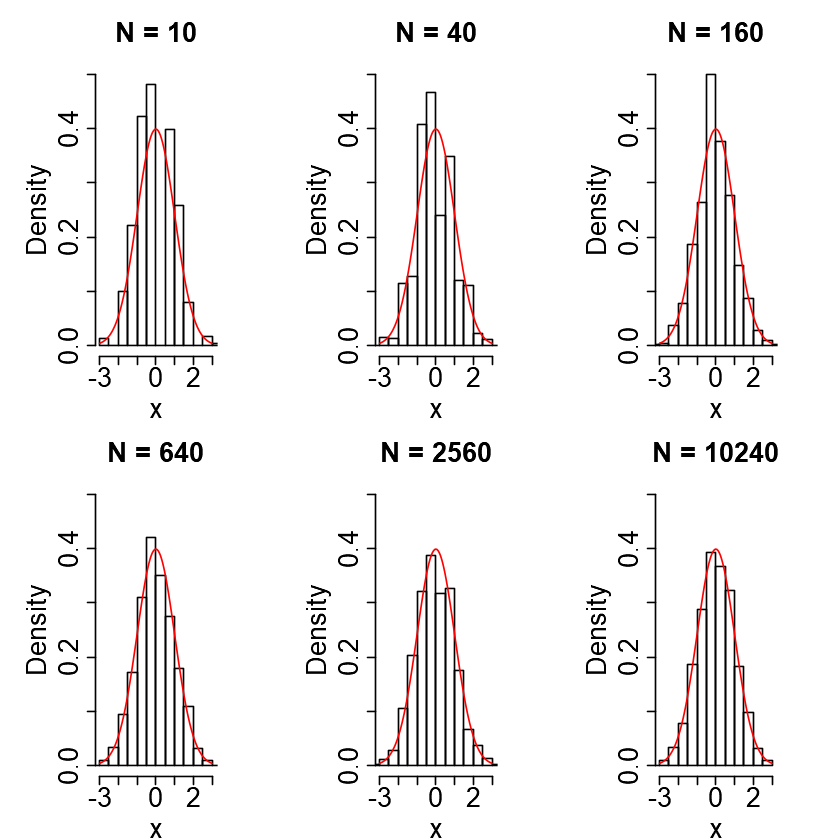

In [16]:
### Central Limit Theorem ###

# Generate matrix to store the standardized means
# Rows correspond to different replications
# Columns correspond to different sample sizes
stdx <- matrix(NA, nrow = rep, ncol = length(sample_sizes))

varx <- mu*(1-mu) # Formula for variance of a Bernoulli RV

# Standardize x
for (n in c(1:length(sample_sizes))) {
    stdx[,n] <- sqrt(sample_sizes[n])*(average[,n]-mu)/sqrt(varx)
}

# Plot results for 6 different sample sizes separately in 2 rows and 3 columns 
# and change left margins of the plots from 4 (default) to 6 (otherwise the y-axis label is cut off)
par(mfrow = c(2, 3), mar = c(4,6,4,4))

# Empirical distribution of the 2000 standardized means for each N
for (n in c(1:length(sample_sizes))) {
    hist(stdx[,n], xlim = c(-3,3), ylim = c(0,.5), freq = FALSE, main = paste("N =", sample_sizes[n]), xlab = "x",
        cex.main = 2, cex.lab = 2, cex.axis = 2) # Increase font size of the titles, labels and ticks
    curve(dnorm(x), col = "red", add = TRUE) # Adding the standard normal density function as a red curve
}

These results are extremely useful because it is easy to work with a (standard) normal distribution and the CLT holds for $X$ coming from any distribution with finite mean and variance. Often the distribution of $X$ is not known and CLT gives us a way to calculate the probabilities for $\bar X_N$.